# CQF Exam 3

## January 2024 Cohort

## Task 1

What is the cost function of Logistic Regression? Explain in Detail.

### Answer:
This follows mostly [1] (p. 7-10, 25-26) and [2].

Logistic regression is one of the most used machine learning methods for classification mapping qualitative data onto categorical variables, e.g. either 0 or 1. The cost function derived for logistic regression is the so-called Binary Cross Entropy cost function and can be derived as follows:

***1. Logistic probability predictor via logit function***

To model the probability $p$ of the classification mapping to 1, we can invert the logit function that converts log-odds to probabilities $$logit(p) = \log\left(\frac{p}{1 - p}\right)=z,$$ solving for $$p=\frac{1}{1 + e^{-z}}=:\sigma(z).$$ This so-called sigmoid function can be used to model probabilities as it yields values between 0 and 1, as can seen per plot below:

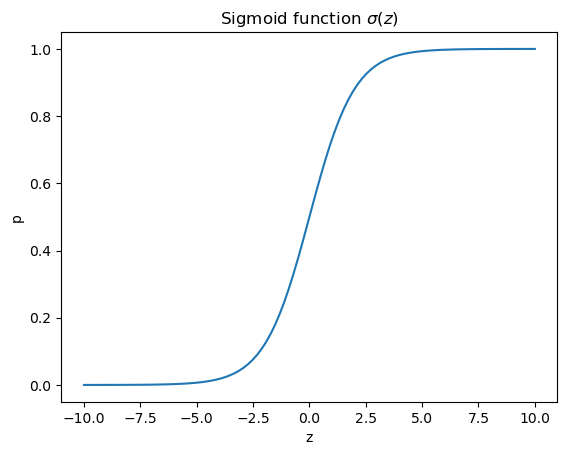

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure()
plt.plot(z, p)
plt.title('Sigmoid function $\sigma(z)$')
plt.xlabel('z')
plt.ylabel('p')
plt.show()

Now, the predictor function for a training data point $(x,y)$ is given by the sigmoid function applied to the linear combination of input features:
$$\hat{y}=P(Y=1|X=x) = \sigma(\mathbf{w}\cdot\mathbf{x}).$$

***2. Probability of the output $y$***

For a given input $x$ and its corresponding label $y$:
$$P(Y=y|X=x)=
\begin{cases}
\hat{y} = \sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=1\\
1-\hat{y} = 1-\sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=0.
\end{cases}$$

***3. Bernoulli distribution***

If $y$ can either take values 0 or 1, then $Y \sim \text{Ber}(p)$ follows a Bernoulli distribution with $p = \sigma(\mathbf{w} \cdot \mathbf{x})$. Hence:
\begin{align*}
P(Y=y|X=x) &=p^y \cdot (1-p)^{(1-y)}\\
&=\sigma(\mathbf{w}\cdot\mathbf{x})^y \cdot \left(1-\sigma(\mathbf{w}\cdot\mathbf{x})\right)^{(1-y)}\\
&=\hat{y}^y \cdot \left(1-\hat{y}\right)^{(1-y)}
\end{align*}

***4. Log-likelihood***

Taking the natural logarithm of the probability of the above and applying logarithm laws yields
$$\log P(Y=y|X=x) = y\log(\hat{y}) + (1-y)\log(1-\hat{y}).$$

***5. Cost function for one training data point $(x,y)$***

To convert this problem into a minimization problem, we consider the negative of the log-likelihood. For a single training example $(x,y)$, we obtain the cost function:
$$L(\hat{y}, y) = -\log P(y|x) = -\left(y\log(\hat{y}) + (1-y)\log(1-\hat{y})\right)$$

***6. Cost function for the entire dataset***

To get the cost function for the entire training dataset, we sum over all training examples and take the average. If we have $n$ training examples, the cost function called the *Binary Cross Entropy function* is then obtained as
\begin{align*}
J(\mathbf{w}) &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\sigma(\mathbf{w}\cdot x^{(i)})) + (1-y^{(i)})\log(1-\sigma(\mathbf{w}\cdot x^{(i)}))\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\right)
\end{align*}

This cost function is minimized to train the logistic regression model, leading to optimal parameters $\mathbf{w}$ that best fit the training data. Since the function is convex, we can use gradient descent to find the global minimum.

## Task 2

What are voting classifers in ensemble learning?

### Answer:
This follows mostly [3] and [4].

Ensemble models are machine learning models that combine multiple individual predictors to arrive at a prediction. A group of predictors forms an ensemble. The idea is that the collective of multiple models often produces better results than a single model in both efficiency and accuracy. To combine the various classifiers into a final predictor, there are different voting classifiers, such as:

**1. Arithmetic averaging**: Each individual model makes a prediction. The final prediction determined by taking the arithmetic average over all individual predictions. This voting style is used in Bagging algorithms like Random Forests which use Decision Trees and can help to reduce variance (help with overfitting).

As a prominent example, the final estimator to a regression problem employing Random Forests sampled into $M$ data sets from the original data set $\mathcal{D}: \mathcal{D}_1,...,\mathcal{D}_M$ trained to maximum depth $f(x,\mathcal{D}_i)$ is given by
$$\hat{f}(x) = \frac{1}{M}\sum_{i=1}^{M}f(x;\mathcal{D}_i).$$

**2. Weighted vote classifiers**: This approach is often used in Boosting algorithms with base models that are weak learning algorithms, i.e. only *slightly* better than chance (e.g. decision tree with low depth and high bias). Boosting algorithms are addititive models which are sequentially trained on smaller structures. Each model aims to correct the errors of its predecessor by adjusting weights used in the weighted average, while the metric to measure (and therefore correct) the error of the predecessor model may vary depending on loss function. Such Boosting algorithms like AdaBoost or Gradient Boosting can help to reduce bias.

As a prominent example, the final estimator to a classification problem with $(x_i,y_i)\in(X,\pm 1)$ of AdaBoost sampled over $M$ weak learners $G_m(x_i)$ is given by the weighted sum
$$\hat{G}(x) = \text{sign}\left(\sum_{m=1}^{M} \alpha_m G_m(x)\right).$$
The weights $\alpha_m = \ln\left(\frac{1 - e_m}{e_m}\right)$ will focus more on weak learners with high errors $$e_m = \frac{\sum_{i=1}^{N} w_i \mathbb{1}_{y_i\neq G(x_i)}}{\sum_{i=1}^{N} w_i}$$
in an attempt to improve the weakest weak learners. The data points $(x_i,y_i)$ are then re-weighted to finally obtain the final ensemble prediction.

**3. Hard voting**: This is a majority voting classifier where the final predictor will be determined by choosing the prediction with the most votes among the individual models. It is often used in classification algorithms, according to Dr. Panos Parpas' lecture, this is e.g. used in Bagging algorithms tailored for classification rather than regression problems. In this method, each model casts a vote for a class, and the class with the most votes is chosen as the final prediction.

**4. Soft Voting**: Unlike hard voting which counts the votes of each classifier in the ensemble and selects the class with the most votes, soft voting calculates the average predicted probabilities of each class for all classifiers and selects the class with the highest average probability. This can provide a more accurate prediction because soft voting also considers the confidence of each model.

## Task 3: Short-term asset return prediction

Follow the 7-steps to model building for your selected ticker,

* (a) produce a model to predict positive moves (up trend) using Support Vector Machine (SVM) model.
* (b) tune hyperparameters for the estimator and present the best model.
* (c) investigate the prediction quality using area under ROC curve, confusion matrix and classification report.

### Answer:
The 7 steps to model building are explained in [5] as follows:

1. Understand the problem
2. Collect data
3. Explore data (visualization!)
4. Clean data (pre-process)
5. Transform data (normalization)
6. Select the appropriate model + train
7. Validate the model

We shall now implement these on the asset price of Tesla (ticker: TSLA) following mostly the approach from Python Labs [2] with some adjustments.

In [272]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import scipy.stats as stats
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, RFECV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [266]:
ticker = "TSLA"  # specify ticker

In [267]:
df = yf.download(ticker, start="2018-01-01")
df['Return'] = df['Close'].pct_change()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,-0.010233
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,-0.008290
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,0.006230
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,0.062638


In [268]:
# Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1610 entries, 2018-01-02 to 2024-05-24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1610 non-null   float64
 1   High       1610 non-null   float64
 2   Low        1610 non-null   float64
 3   Close      1610 non-null   float64
 4   Adj Close  1610 non-null   float64
 5   Volume     1610 non-null   int64  
 6   Return     1609 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 100.6 KB


In [269]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,-0.010233
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,-0.008290
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,0.006230
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,0.062638


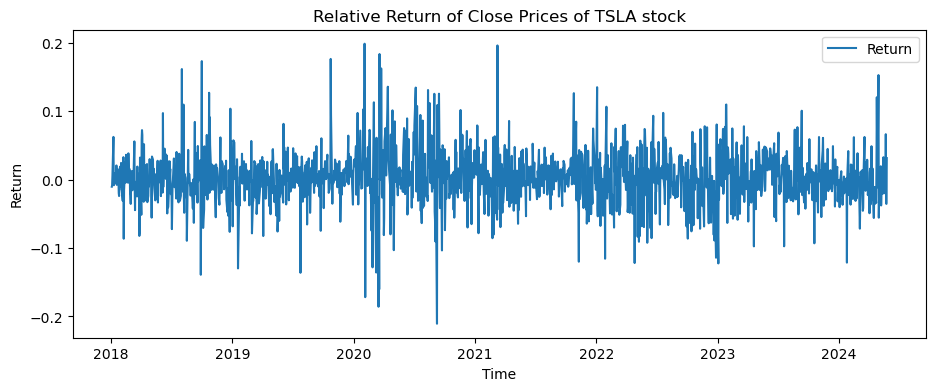

In [271]:
# Visualize the return data
plt.figure(figsize=(11, 4))
plt.plot(df['Return'], label='Return')
plt.title(f'Relative Return of Close Prices of {ticker} stock')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.show()

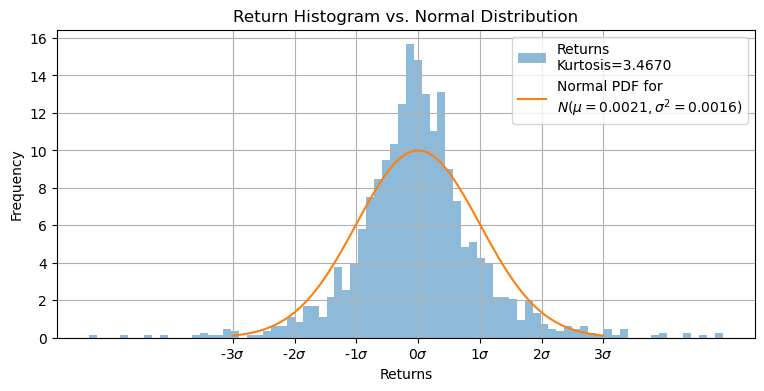

In [343]:
# Compare to normal distribution
mu = df['Return'].mean()
sigma = df['Return'].std()
kurtosis = stats.kurtosis(df['Return'].dropna())
plt.figure(figsize=(9, 4))
plt.hist(df['Return'], density=True, bins=80, label=f"Returns\nKurtosis={kurtosis:.4f}", alpha=0.5)

# following 68–95–99.7 rule, 3 stdevs from mean contain 99.7% of normally distributed values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm(mu, sigma).pdf(x), label=f"Normal PDF for\n$N(\mu=${mu:.4f}$, \sigma^2=${sigma**2:.4f})")

plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Return Histogram vs. Normal Distribution")
plt.legend()

xticks = np.linspace(mu - 3*sigma, mu + 3*sigma, 7)
plt.xticks(xticks, labels=[f"{i}$\sigma$" for i in range(-3, 4)])
plt.grid()
plt.show()

Our plot shows a pattern often observed for financial returns (also explained in e.g. [8]): The returns of our considered asset are not normally distributed with kurtosis $>3$, implying higher peaks and fatter tails than normal distribution.

In [344]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1610.0,1.485260e+02,1.105961e+02,1.207333e+01,2.261767e+01,1.724550e+02,2.386650e+02,4.114700e+02
High,1610.0,1.518209e+02,1.129848e+02,1.244533e+01,2.313150e+01,1.753667e+02,2.437592e+02,4.144967e+02
Low,1610.0,1.449756e+02,1.079156e+02,1.179933e+01,2.222217e+01,1.677700e+02,2.339975e+02,4.056667e+02
Close,1610.0,1.484736e+02,1.104616e+02,1.193133e+01,2.258000e+01,1.720250e+02,2.386875e+02,4.099700e+02
Adj Close,1610.0,1.484736e+02,1.104616e+02,1.193133e+01,2.258000e+01,1.720250e+02,2.386875e+02,4.099700e+02
Volume,1610.0,1.311884e+08,8.164680e+07,2.940180e+07,8.137665e+07,1.073670e+08,1.507046e+08,9.140820e+08
Return,1609.0,2.115541e-03,3.989257e-02,-2.106282e-01,-1.916253e-02,1.535081e-03,2.063317e-02,1.989486e-01


Check if original data needs cleaning + clean appropriately

In [345]:
 # Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

Clean the data + remove NaN value from "Return" column:

In [346]:
df = df.dropna()  # drop NaN values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

#### Feature engineering

Features are independent variables which are used to determine the value of the target variable. We will generate a set of features from the downloaded dataset according to the definition from the exam paper.

In [347]:
def get_features(df):
    df['O-C'] = df['Open'] - df['Close']
    df['H-L'] = df['High'] - df['Low']
    df['Sign'] = np.sign(np.log(df['Close'] / df['Close'].shift(1)))

    for lag in [1, 3, 5, 10, 21]:
        df[f'Past Return_{lag}'] = df['Return'].shift(lag)

    for momentum_period in [1, 3, 5, 10, 21]:
        df[f'Momentum_{momentum_period}'] = df['Close'] - df['Close'].shift(momentum_period)

    for sma_period in [1, 3, 5, 10, 21]:
        df[f'SMA_{sma_period}'] = df['Close'].rolling(window=sma_period).mean()

    for ema_period in [1, 3, 5, 10, 21]:
        df[f'EMA_{ema_period}'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

    df.dropna(inplace=True)
    features = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    return features


features = get_features(df)
features.head()

,Adj Close,Return,O-C,H-L,Sign,Past Return_1,Past Return_3,Past Return_5,Past Return_10,Past Return_21,...,SMA_1,SMA_3,SMA_5,SMA_10,SMA_21,EMA_1,EMA_3,EMA_5,EMA_10,EMA_21
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-02,22.916668,-0.015748,0.312666,0.762667,-1.0,-0.014281,-0.010614,0.015431,0.015817,-0.010233,...,22.916668,23.273556,23.235467,23.155933,22.747524,22.916668,23.115321,23.142489,23.071941,22.733514
2018-02-05,22.208668,-0.030895,0.322666,0.764666,-1.0,-0.015748,0.024550,0.019484,0.004400,-0.008290,...,22.208668,22.802890,23.016800,23.033067,22.806286,22.208668,22.661994,22.831215,22.914982,22.685801
2018-02-06,22.264668,0.002522,-0.584000,0.848000,1.0,-0.030895,-0.014281,-0.010614,0.003499,0.006230,...,22.264668,22.463334,22.858801,22.907600,22.861492,22.264668,22.463331,22.642366,22.796743,22.647516
2018-02-07,23.000000,0.033027,-0.400667,0.689335,1.0,0.002522,-0.015748,0.024550,-0.019558,0.062638,...,23.000000,22.491112,22.734667,22.901667,22.888762,23.000000,22.731665,22.761577,22.833699,22.679560
2018-02-08,21.015333,-0.086290,1.872000,2.268000,-1.0,0.033027,-0.030895,-0.014281,-0.023852,-0.008085,...,21.015333,22.093334,22.281067,22.752267,22.830159,21.015333,21.873499,22.179496,22.503087,22.528267


#### Label specification

For general trend analysis, we would like to include slight drops of up to 0.25% in the closing price of TSLA still part of the positive class (1), so we design our target variable as follows:

In [348]:
def get_target(df):
    # for trend prediction, contain days with small decrease (< 0.25%) in asset close price also within positive class
    return np.where(df['Close'].shift(-1) > 0.9975 * df['Close'], 1, 0)

In [349]:
X = features
y = get_target(df)

# Check Class Imbalance
pd.Series(y).value_counts()

1    882
0    706
Name: count, dtype: int64

We observe that the number of days where the TSLA closed positively w.r.t. our definition (i.e. at least at 99.75% of the previous day's closing price; class variable 1) are higher than the number of days where the index closed negatively (class variable 0).

#### Split data

Before we dive deeper into feature selection, we want to split our data into testing and training data.

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Feature selection

This follows mostly [6], Exercise 1 that discussed various feature selection methods.

Let us firstly consider multicollinearity which would lead to redundancy in the following trend analysis. For each variable, the so-called Variance Inflation Factor (VIF) calculates its $$\text{VIF}_i =\frac{1}{1-R_i^2},$$ where $R_i^2$ determines how well feature $i$ is being regressed against by all other features. The feature is more correlated with the other features, the higher the value of $R_i^2$ is. According to [6], a VIF-value exceeding 5 indicates high multicollinearity.

In [351]:
def variance_inflation_factor_analysis(X, threshold=5):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data[vif_data["VIF"] < threshold]


vif_data = variance_inflation_factor_analysis(X_train)
vif_data.round(2).sort_values(by="VIF", ascending=False)

,feature,VIF
1,Return,3.52
2,O-C,3.18
6,Past Return_3,2.75
5,Past Return_1,2.62
7,Past Return_5,2.51
4,Sign,2.09
8,Past Return_10,1.79
9,Past Return_21,1.30


In [264]:
selected_features_vif = vif_data['feature']
X_train_vif = X_train[selected_features_vif]
X_test_vif = X_test[selected_features_vif]
X_train_vif.head()

,Return,O-C,Sign,Past Return_1,Past Return_3,Past Return_5,Past Return_10,Past Return_21
Date,,,,,,,,
2018-03-06,-0.015449,0.370001,-1.0,-0.005282,-0.035358,-0.017990,-0.002146,-0.015748
2020-09-02,-0.058268,10.539993,-1.0,-0.046697,-0.011323,0.064166,-0.004536,0.001347
2018-04-19,0.022942,-0.600000,1.0,0.019674,-0.030399,-0.022763,0.065449,-0.009599
2019-09-13,-0.002725,0.117334,-1.0,-0.004978,0.016178,-0.009278,0.028387,-0.065447
2023-05-25,0.008584,2.069992,1.0,-0.015449,0.048462,0.017428,0.021004,-0.043070


Another way to check for correlation between features is to use the correlation matrix computing the Pearson correlation $$\rho_{ij} = \frac{\text{cov}(X_i, X_j)}{\sigma_{X_i} \sigma_{X_j}}$$ pairwisely between feature $X_i$ and feature $X_j$. High correlation or high anti-correlation are both indicators to discard those features.

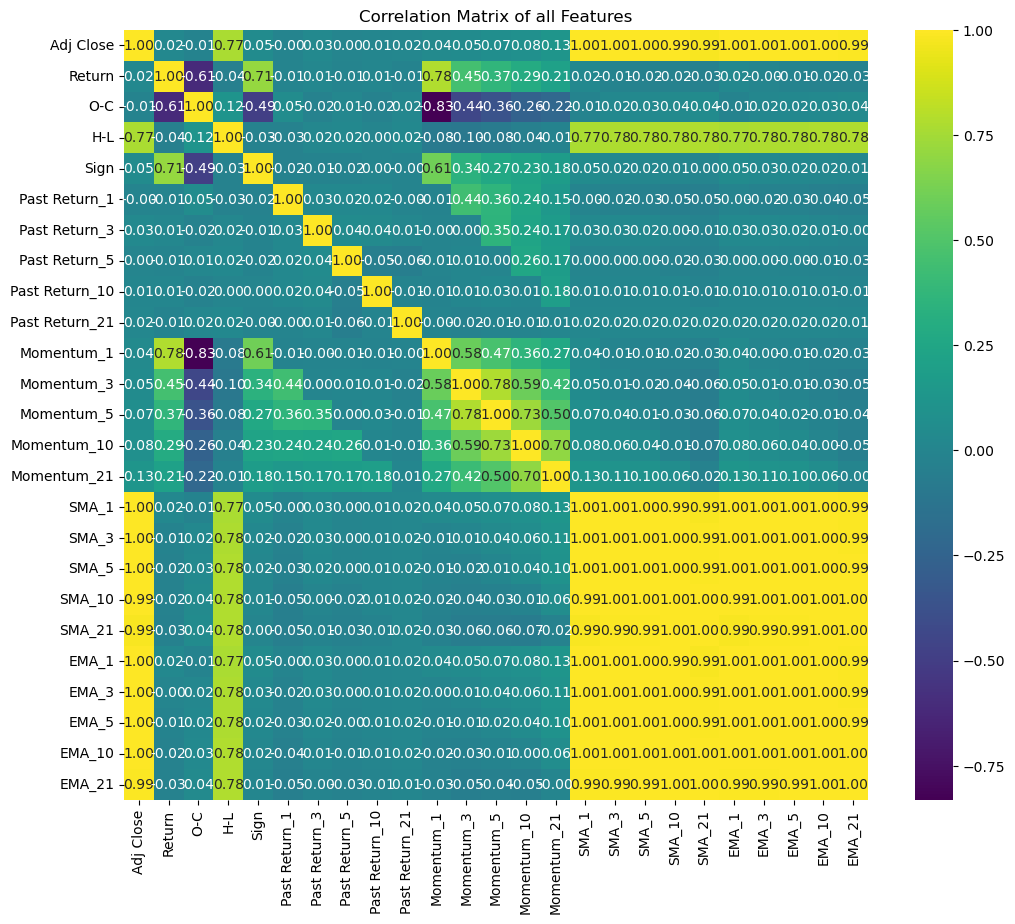

In [254]:
def correlation_matrix_analysis(X):
    corr_matrix = X.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="viridis")
    plt.title("Correlation Matrix of all Features")
    plt.show()


correlation_matrix_analysis(X_train)

 `SelectKBest` is a feature selection algorithm introduced in e.g. [6]. It selects the top $k$ features with the highest scroes based on statistical testing. In our case, we use the `f_classif` test based on the and select the 10 best features (standard the standard implementation of according to [7]). `f_classif` is based on the ANOVA F-value test.

In [260]:
def select_k_best(X, y, k=10):
    selector = SelectKBest(k=k)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return selected_features, X_selected

selected_features_kbest, X_train_kbest = select_k_best(X_train, y_train, k=10)

print("SelectKBest selected features:\n", selected_features_kbest)

SelectKBest selected features:
 Index(['Return', 'O-C', 'Past Return_1', 'Past Return_3', 'Past Return_5',
       'Past Return_10', 'Past Return_21', 'Momentum_1', 'Momentum_10',
       'Momentum_21'],
      dtype='object')


In [261]:
X_train_kbest = X_train[selected_features_kbest]
X_test_kbest = X_test[selected_features_kbest]
X_train_kbest.head()

,Return,O-C,Past Return_1,Past Return_3,Past Return_5,Past Return_10,Past Return_21,Momentum_1,Momentum_10,Momentum_21
Date,,,,,,,,,,
2018-11-02,0.006187,-0.177999,0.020633,-0.014783,0.050943,-0.014816,-0.043996,0.142000,5.760668,4.305332
2020-07-13,-0.030810,10.795998,0.107848,-0.017254,0.134794,-0.026613,-0.050934,-3.172668,35.821335,34.947998
2020-06-15,0.059469,-4.873997,-0.038609,0.089702,0.072556,0.075569,0.015639,3.707996,6.186665,12.504665
2021-03-15,0.020483,-4.616669,-0.008391,-0.008195,-0.058450,0.063553,0.008499,4.736664,-3.496674,-34.573349
2019-05-16,-0.015607,0.077332,-0.001550,-0.052229,-0.011681,0.043118,0.026203,-0.241333,-1.051332,-3.002001


## References

* [1]: JA244.5: Lecture Notes on *Supervised Learning II" by Kannan Singaravelu, CQF Faculty
* [2]: JA24P10: CQF Python Labs on *Trend prediction using Logistic Regression* by Kannan Singaravelu
* [3]: JA244.6: Lecture Notes on *Decision Trees & Ensemble Models* by Dr. Panos Parpas, CQF Associate Faculty
* [4]: JA24P11: CQF Python Labs on *Gradient Boosting for Price Prediction* by Kannan Singaravelu
* [5]: JA244.4: Lecture Notes on *Supervised Learning I* by Kannan Singaravelu, CQF Faculty
* [6]: JA244.4: Solutions on *Supervised Learning I* by Kannan Singaravelu, CQF Faculty
* [7]: [`sklearn.feature_selection.SelectKBest` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html): retrieved on 2024-05-24
* [8]: JA242.4: Lecture Notes on *Asset Returns: Key Imperial Stylized Facts* by Prof. Stephen Taylor, CQF Associate Faculty